In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import Laguerre_Gaussian as LG
import phaseScreenGeneration as PS


In [ ]:
#Screen parameters
N = 256
L = 3
dx = L/N

#Photon parameters
zi = 0
zf = 100000
wvl = 500e-9
wr = 0.13
wvn = 1/wvl

#Phasescreen parameters
nScreens = 100
dz = zf/nScreens
modAlpha = 0.3
angleAlpha = 2*np.pi*np.random.rand()
L0 = 50
kl = 3.3/0.010

##Pre-Generation Checks

Test the selected parameters work as intended


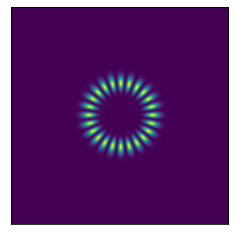

In [ ]:
ql = 12
Uplus0 = LG.UGen(wr, wvl, zf, N, L, ql)
Uminus0 = LG.UGen(wr, wvl, zf, N, L, -ql)
LG.CMgraph(LG.waveMerge(Uplus0,Uminus0))

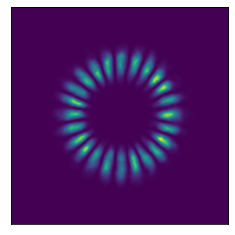

In [ ]:
cn2 = 10e-15
xfs, yfs = PS.freqRanges(N, L)
screenStackTest = PS.phaseStackGenAuto(N, nScreens, L, modAlpha, angleAlpha, dz, cn2, L0, kl, wvn, L/N) / dx
Uplus1 = PS.propTurbulenceMulti(dz, Uplus0, N, L, np.real(screenStackTest), wvn, zf, zi)
Uminus1 = PS.propTurbulenceMulti(dz, Uminus0, N, L, np.real(screenStackTest), wvn, zf, zi)
LG.CMgraph(LG.waveMerge(Uplus1,Uminus1))

Final tests to select Cn2 constants to use for each category

In [ ]:
#Non linear selection of Cn2 values
cn2s = [1e-16,2e-16,3e-16,4e-16,5e-16,6e-16,7e-16,8e-16,9e-16,1e-15,
       2e-15,3e-15,4e-15,5e-15,6e-15,7e-15,8e-15,9e-15,10e-15,12e-15,
       14e-15, 16e-15, 18e-15, 20e-15, 25e-15, 30e-15, 35e-15, 40e-15, 45e-15, 50e-15, 60e-15,
       70e-15, 80e-15, 90e-15, 100e-15, 200e-15, 300e-15, 400e-15, 500e-15, 600e-15, 700e-15]

xfs, yfs = PS.freqRanges(N, L)
Ustack = np.zeros((N,N,40))
screenStacksTest2 = np.zeros((N,N,nScreens))
Uplus = np.zeros((N,N))
Uminus = np.zeros((N,N))

for j in range(40):
    screenStacksTest2 = np.real(PS.phaseStackGenAuto(N, nScreens, L, modAlpha, angleAlpha, dz, cn2s[j], L0, kl, wvn, L/N) / dx)
    Uplus = PS.propTurbulenceMulti(dz, Uplus0, N, L, screenStacksTest2, wvn, zf, zi)
    Uminus = PS.propTurbulenceMulti(dz, Uminus0, N, L, screenStacksTest2, wvn, zf, zi)
    Ustack[:,:,j] = LG.waveMerge(Uplus, Uminus)

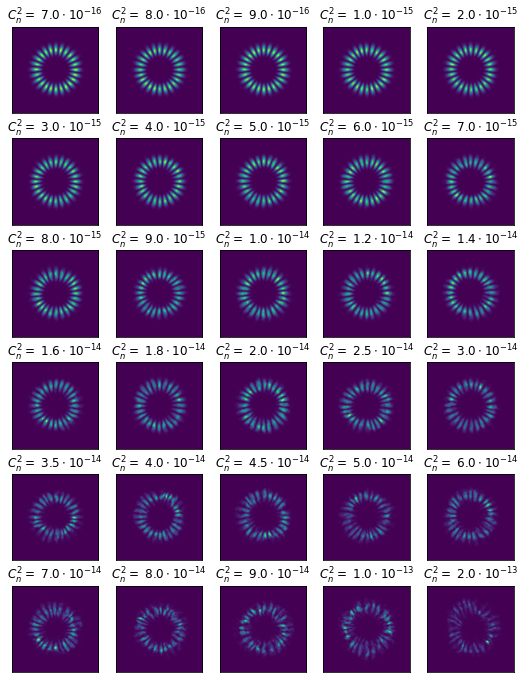

In [ ]:
#Graph Stuff
cn2st = ["$1.0 \cdot 10^{-16}$","$2.0 \cdot 10^{-16}$","$3.0 \cdot 10^{-16}$","$5.0 \cdot 10^{-16}$","$6.0 \cdot 10^{-16}$",
         "$7.0 \cdot 10^{-16}$","$8.0 \cdot 10^{-16}$","$9.0 \cdot 10^{-16}$","$1.0 \cdot 10^{-15}$",
       "$2.0 \cdot 10^{-15}$","$3.0 \cdot 10^{-15}$","$4.0 \cdot 10^{-15}$","$5.0 \cdot 10^{-15}$","$6.0 \cdot 10^{-15}$",
         "$7.0 \cdot 10^{-15}$","$8.0 \cdot 10^{-15}$","$9.0 \cdot 10^{-15}$","$1.0 \cdot 10^{-14}$","$1.2 \cdot 10^{-14}$",
       "$1.4 \cdot 10^{-14}$", "$1.6 \cdot 10^{-14}$", "$1.8 \cdot 10^{-14}$", "$2.0 \cdot 10^{-14}$", "$2.5 \cdot 10^{-14}$",
         "$3.0 \cdot 10^{-14}$", "$3.5 \cdot 10^{-14}$", "$4.0 \cdot 10^{-14}$", "$4.5 \cdot 10^{-14}$", "$5.0 \cdot 10^{-14}$",
         "$6.0 \cdot 10^{-14}$",
       "$7.0 \cdot 10^{-14}$", "$8.0 \cdot 10^{-14}$", "$9.0 \cdot 10^{-14}$", "$1.0 \cdot 10^{-13}$", "$2.0 \cdot 10^{-13}$", 300e-15, 400e-15, 500e-15, 600e-15, 700e-15]

fig = plt.figure(figsize = (9,12))
for j in range(30):
    ax = plt.subplot(6,5,j+1)
    ax = plt.imshow(Ustack[:,:,j+5], cmap = cm.viridis)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_title("$C_n^2 =$ " + str(cn2st[j+5]))

##Data Generation Loop

In [ ]:
#Generation Constants
modes = range(0, 32)
nBatches = 5
nPerBatch = 50
cn2Base = [1e-15, 9e-15, 1.6e-14]
cn2Ranges = [8e-15, 7e-15, 4e-14]
strengths = ['weak', 'medium', 'strong']

WARNING: Takes literal days to run

1 image ~ 1 min => whole dataset ~ 5.5 days

In [ ]:
for k, strength in enumerate(strengths):

    for i in modes:

        #Inital intesity generation
        Uplus0 = LG.UGen(wr, wvl, zi, N, L, i)
        Uminus0 = LG.UGen(wr, wvl, zi, N, L, -i)

        for j in range(nBatches):

            #Reset temporary image storage
            y = np.zeros((N,N,0))

            for k in range(nPerBatch):
                
                #The generation loop
                cn2 = np.random.rand()*cn2Ranges[k] + cn2Base[k]
                ScreenStacksTmp = np.real(PS.phaseStackGenAuto(N, nScreens, L, modAlpha, angleAlpha, dz, cn2, L0, kl, wvn, L/N) / dx)
                Uplus = PS.propTurbulenceMulti(dz, Uplus0, N, L, ScreenStacksTmp, wvn, zf, zi)
                Uminus = PS.propTurbulenceMulti(dz, Uminus0, N, L, ScreenStacksTmp, wvn, zf, zi)
                Result = (LG.waveMerge(Uplus, Uminus))

                y = np.dstack((y,Result))
            
            np.save(("Data/3x3" + strength + "Turb" + str(i) + "Batch" + str(j) + ".npy"),y)

            #Checkpoint notifications
            print("Batch " + str(j) + " Complete")
        print("L = " + str(i) + " Complete")
    print(strength, "Turb Complete")